# ***Usar Pipelines y Validación Cruzada***

# ***Problema de Clasificación base de datos: Breast Cancer Wisconsin***


Desarrollado por: Profesor Felipe Palta

felipe.palta@javerianacali.edu.co

**Asignatura:** Aprendizaje de máquina y Análisis de datos


Cargue de la base de datos:

In [1]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/breast-cancer-wisconsin/wdbc.data', header=None)

df.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
df.shape

(569, 32)

Se procede a extraer la matriz de características X y el vector de targets y, para más adelante usar el LabelEncoder para convertir el vector y.

In [3]:
X = df.loc[:, 2:].values
y = df.loc[:, 1].values


In [4]:
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'M'
 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M' 'M'
 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'M'
 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['B', 'M'], dtype=object)

In [7]:
le.transform(['M', 'B'])

array([1, 0])

In [6]:
print(y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

Se procede a realizar la división en el conjunto de datos de entrenamiento (80%) y prueba (20%):

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.20,
                     stratify=y,
                     random_state=1)

Con el objetivo de usar **pipeline** vamos a concatenar nuestro proceso de entrenamiento en tres pasos:



1.   Estandarizar los datos.
2.   Aplicar PCA para reducir la dimensionalidad k = 2.
3.   Aplicar el algoritmo de Regresión Logística (LR) para clasificar.

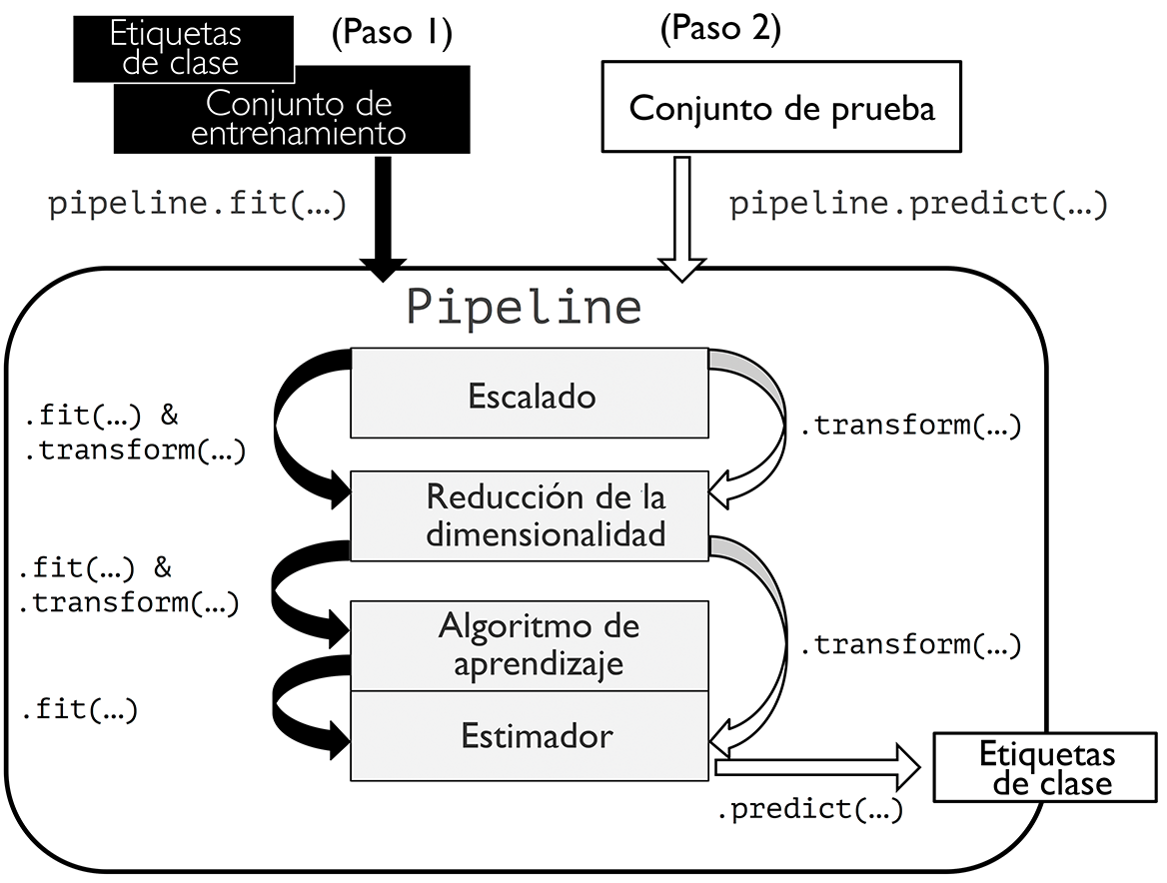



In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

from sklearn.pipeline import make_pipeline

pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(random_state=1))


Una vez creado el flujo de trabajo, se procede a entrenar el modelo:

In [11]:
pipe_lr.fit(X_train, y_train)

y_pred = pipe_lr.predict(X_test)

print('Exactitud del dataset de testeo: %.3f' % pipe_lr.score(X_test, y_test))

Exactitud del dataset de testeo: 0.956


# **Validación cruzada con retención**

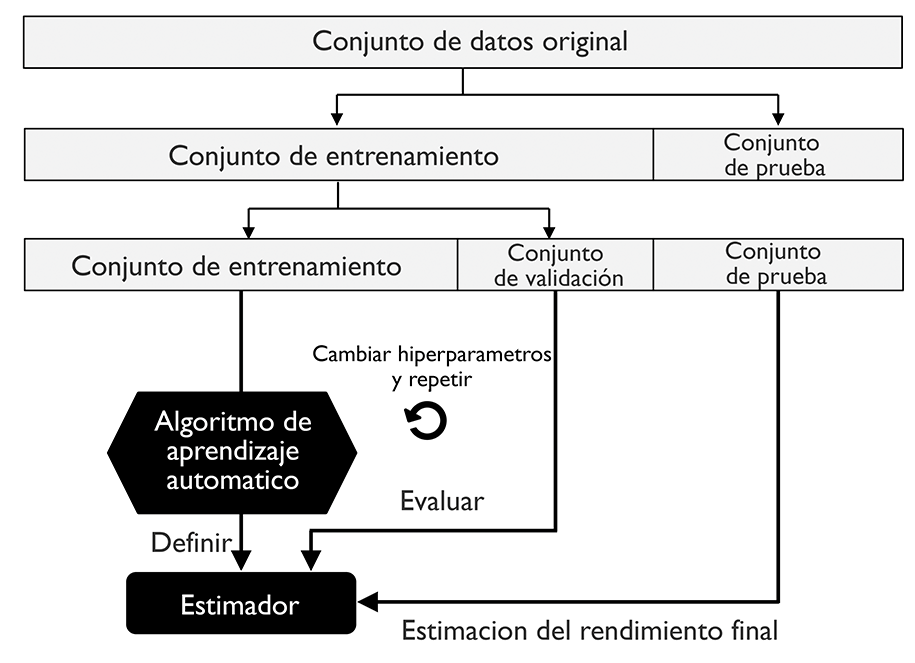

# **Validación cruzada de K iteraciones**

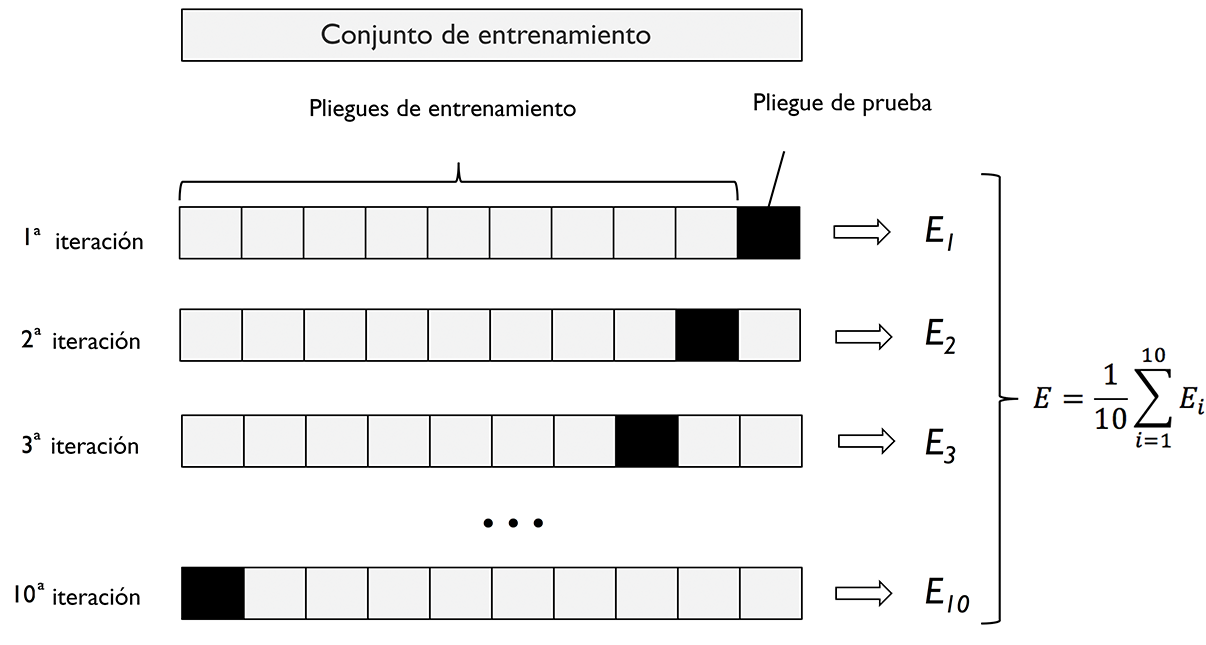

In [21]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

# Crear el objeto StratifiedKFold
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=1).split(X_train, y_train)

scores = []
models = []

for k, (train, test) in enumerate(kfold):
    pipe_lr.fit(X_train[train], y_train[train])
    score = pipe_lr.score(X_train[test], y_train[test])
    scores.append(score)
    models.append(pipe_lr)  # Almacenar el modelo entrenado en la lista
    print('Fold / Pliegue: %2d, Distribución de Clases.: %s, Exactitud / Acc: %.3f' % (k+1, np.bincount(y_train[train]), score))

print('\n Validación cruzada; Exactitud: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

# Seleccionar el modelo con la mejor exactitud
best_model_index = np.argmax(scores)
best_model = models[best_model_index]

print(f'\nMejor modelo está en el pliegue {best_model_index + 1} con una exactitud de {scores[best_model_index]:.3f}')


Fold / Pliegue:  1, Distribución de Clases.: [256 153], Exactitud / Acc: 0.913
Fold / Pliegue:  2, Distribución de Clases.: [256 153], Exactitud / Acc: 1.000
Fold / Pliegue:  3, Distribución de Clases.: [256 153], Exactitud / Acc: 0.957
Fold / Pliegue:  4, Distribución de Clases.: [256 153], Exactitud / Acc: 0.978
Fold / Pliegue:  5, Distribución de Clases.: [256 153], Exactitud / Acc: 0.891
Fold / Pliegue:  6, Distribución de Clases.: [257 153], Exactitud / Acc: 0.933
Fold / Pliegue:  7, Distribución de Clases.: [257 153], Exactitud / Acc: 0.933
Fold / Pliegue:  8, Distribución de Clases.: [257 153], Exactitud / Acc: 0.978
Fold / Pliegue:  9, Distribución de Clases.: [257 153], Exactitud / Acc: 0.978
Fold / Pliegue: 10, Distribución de Clases.: [257 153], Exactitud / Acc: 0.911

 Validación cruzada; Exactitud: 0.947 +/- 0.034

Mejor modelo está en el pliegue 2 con una exactitud de 1.000


In [22]:
import joblib

# Guardar el mejor modelo
joblib.dump(best_model, 'mejor_modelo.pkl')

# Cargar el modelo en otro momento
mejor_modelo_cargado = joblib.load('mejor_modelo.pkl')


In [23]:
y_predict = mejor_modelo_cargado.predict(X_test)

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Calcula la matriz de confusión
cm_ = confusion_matrix(y_test, y_predict)

print(cm_)

[[71  1]
 [ 4 38]]


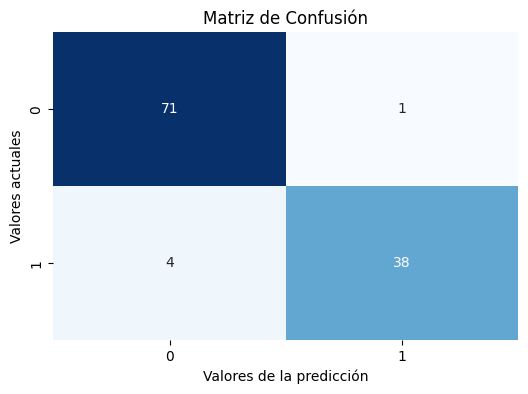

In [27]:
import matplotlib.pyplot as plt

# Graficar la matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(cm_, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Valores de la predicción')
plt.ylabel('Valores actuales')
plt.title('Matriz de Confusión')
plt.show()

Otra manera de hacerlo:

In [28]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=pipe_lr,
                         X=X_train,
                         y=y_train,
                         cv=10,
                         n_jobs=1)
print('CV Exactitudes: %s' % scores)
print('CV Exatitud: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

CV Exactitudes: [0.93478261 0.93478261 0.95652174 0.95652174 0.93478261 0.95555556
 0.97777778 0.93333333 0.95555556 0.95555556]
CV Exatitud: 0.950 +/- 0.014
